<a href="https://colab.research.google.com/github/gogowonji/Big-Data-Analysis/blob/main/20230523_project10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
import xlrd
import pandas as pd
test = pd.read_excel('cal_housing.xlsx',header=None)
test.head()

,0
0,"-122.230000,37.880000,41.000000,880.000000,129..."
1,"-122.220000,37.860000,21.000000,7099.000000,11..."
2,"-122.240000,37.850000,52.000000,1467.000000,19..."
3,"-122.250000,37.850000,52.000000,1274.000000,23..."
4,"-122.250000,37.850000,52.000000,1627.000000,28..."


In [8]:
housing = pd.DataFrame(test[0].apply(lambda v: v.split(sep=',')).tolist(), 
                       columns = ('longitude','latitude','housingMedianAge','totalRooms',
                                  'totalBedrooms','population','households','medianIncome','medianHouseValue'))
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   longitude         20640 non-null  object
 1   latitude          20640 non-null  object
 2   housingMedianAge  20640 non-null  object
 3   totalRooms        20640 non-null  object
 4   totalBedrooms     20640 non-null  object
 5   population        20640 non-null  object
 6   households        20640 non-null  object
 7   medianIncome      20640 non-null  object
 8   medianHouseValue  20640 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [9]:
housing = housing.astype(float)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
housing.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [22]:
total = housing['totalRooms']
housholds = housing['households']

housing['AvgRooms']= total.div(housholds, axis=0) #행과 행을 나누는 것이니까 0

housing.head()
housing2 = pd.DataFrame(housing.iloc[0:700])

In [23]:
housing2.shape
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         700 non-null    float64
 1   latitude          700 non-null    float64
 2   housingMedianAge  700 non-null    float64
 3   totalRooms        700 non-null    float64
 4   totalBedrooms     700 non-null    float64
 5   population        700 non-null    float64
 6   households        700 non-null    float64
 7   medianIncome      700 non-null    float64
 8   medianHouseValue  700 non-null    float64
 9   AvgRooms          700 non-null    float64
dtypes: float64(10)
memory usage: 54.8 KB


독립변수 종속변수
학습용 테스트용 나누기
모델링
예측값
비교
모델 성능 측정

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = housing2['medianHouseValue']
X = housing2.drop(['medianHouseValue'], axis = 1, inplace = False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)


In [25]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

In [26]:
import numpy as np

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print("MSE : {0:.3f}, RMSE : {1:.3f}".format(mse,rmse))
print("R^2(Variance score) : {0:.3f}".format(r2_score(Y_test, Y_predict)))


MSE : 4543481865.470, RMSE : 67405.355
R^2(Variance score) : 0.543


In [27]:
print("Y 절편 값: ", lr.intercept_)
print("회귀 계수 값: ", np.round(lr.coef_,1))

coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

Y 절편 값:  -9229647.65897239
회귀 계수 값:  [ 4.068000e+03  2.574474e+05  4.932000e+02  4.900000e+00 -2.307000e+02
 -4.590000e+01  3.736000e+02  3.417480e+04  7.473600e+03]


latitude            257447.39
medianIncome         34174.85
AvgRooms              7473.61
longitude             4068.01
housingMedianAge       493.22
households             373.64
totalRooms               4.92
population             -45.94
totalBedrooms         -230.73
dtype: float64

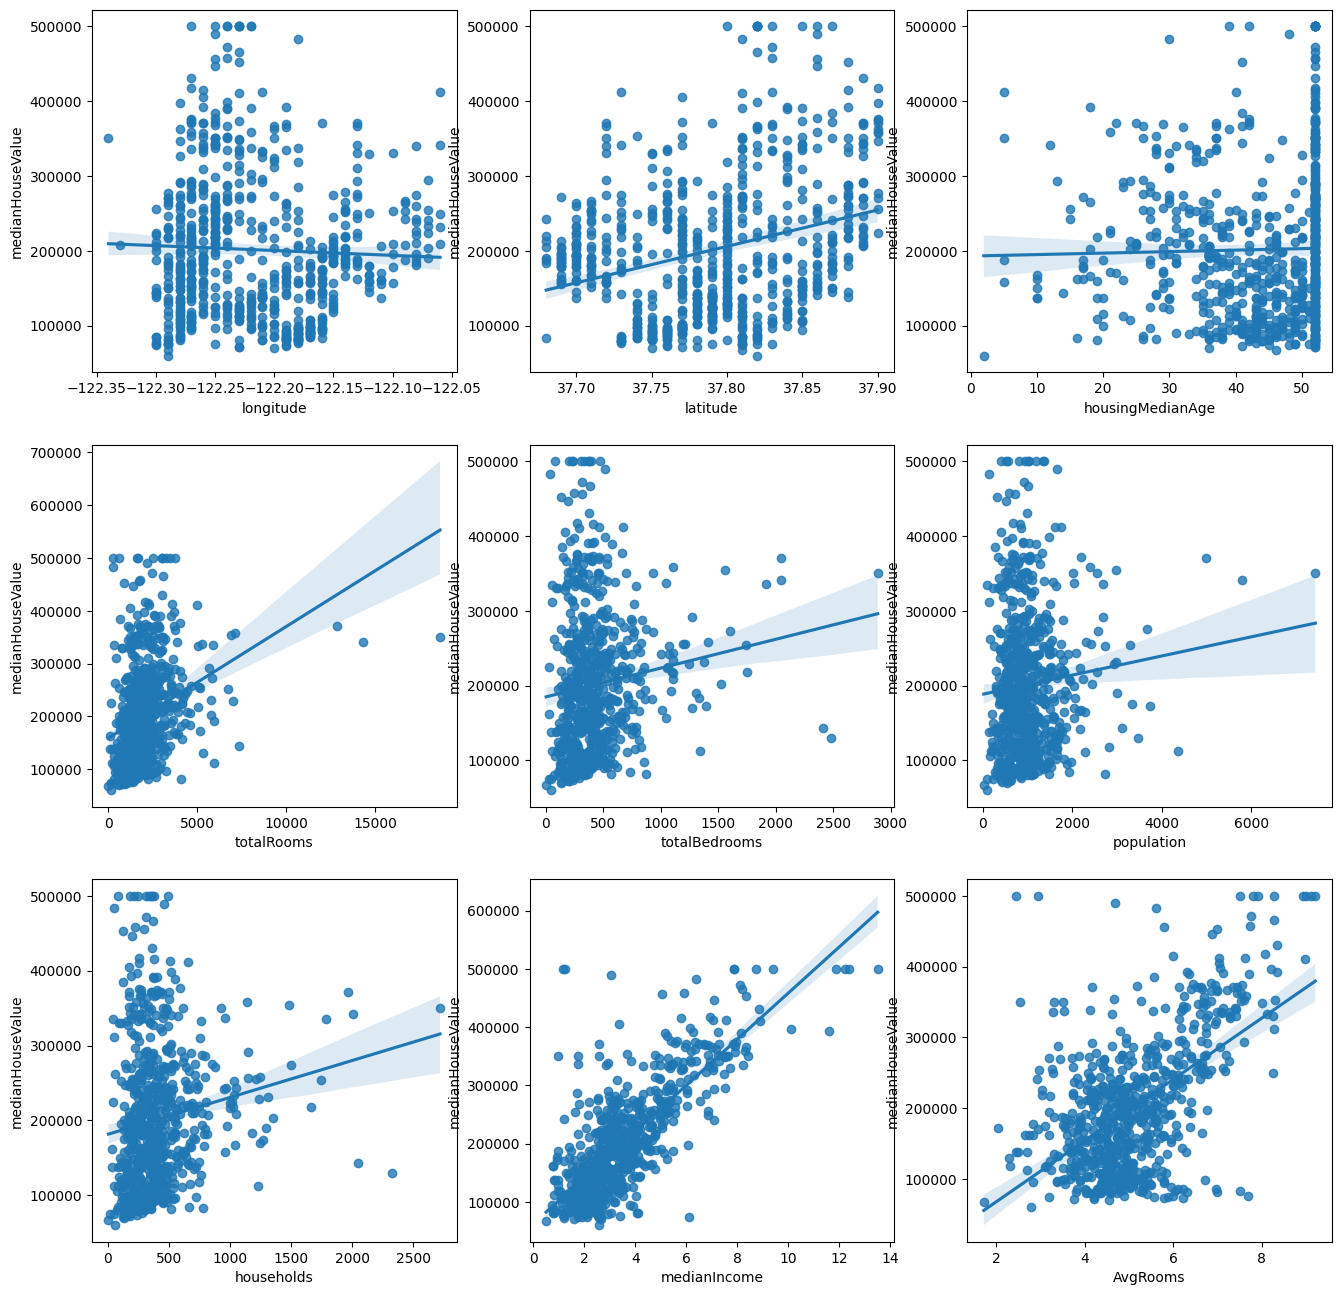

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 3)
x_features =['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms',
             'population','households','medianIncome','AvgRooms']
for i , feature in enumerate(x_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x = feature, y = 'medianHouseValue',
              data = housing2, ax = axs[row][col])